# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Load data

In [2]:
data = pd.read_csv('/datasets/vehicles_us.csv')# Load the data file into a DataFrame

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [3]:
data.info()
data.describe()# print the general/summary information about the DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [5]:
data.duplicated().sum()

0

## Treat missing values (if any)

In [6]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:


data.isna().mean()*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [8]:


pd.DataFrame(data.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
is_4wd,50.369723
paint_color,17.985444
odometer,15.316836
cylinders,10.208637
model_year,7.023775
days_listed,0.000000
date_posted,0.000000
type,0.000000
transmission,0.000000
fuel,0.000000


# model_year

In [9]:


olddf = data.copy()

In [10]:
data['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

In [11]:
relevant_years = data.query('model_year > 1991')
grouped_years = relevant_years.groupby('model')['model_year'].median()
for i in grouped_years.index:
    data.loc[(data['model'] == i) & (data['model_year'].isnull()), 'model_year'] = grouped_years[i]
    
data['model_year'] = data['model_year'].astype('int')

In [12]:


data.query('model=="hyundai sonata"').model_year.describe().loc[['min', 'max']]

min    1997.0
max    2018.0
Name: model_year, dtype: float64

<div class="alert alert-info">
<h2> Student's comment</h2> 
</div> The issue with this column that there are about 7% missing values, and I thought that it's alot of data to ignore and after wards to do calculations on this column, it wouldn't be accurate, so I decided to fill them this way and to change the column type from float to int because it's a year column, there is no model car with half a year..


In [13]:


def minmax(x):
    return max(x) - min(x)

olddf.groupby('model')['model_year'].agg(['min', 'max', minmax])

,min,max,minmax
model,,,
acura tl,1999.0,2014.0,15.0
bmw x5,2001.0,2018.0,17.0
buick enclave,2008.0,2018.0,10.0
cadillac escalade,1908.0,2019.0,111.0
chevrolet camaro,1967.0,2019.0,52.0
...,...,...,...
toyota sienna,1998.0,2019.0,21.0
toyota tacoma,1989.0,2019.0,30.0
toyota tundra,2000.0,2018.0,18.0


In [14]:


olddf.groupby('model')['model_year'].agg(['min', 'max', minmax]).query('minmax < 15')

,min,max,minmax
model,,,
buick enclave,2008.0,2018.0,10.0
chevrolet camaro lt coupe 2d,2010.0,2019.0,9.0
chevrolet cruze,2006.0,2019.0,13.0
chevrolet equinox,2005.0,2019.0,14.0
chevrolet silverado 1500 crew,2007.0,2018.0,11.0
chevrolet trailblazer,1999.0,2009.0,10.0
chevrolet traverse,2006.0,2019.0,13.0
chrysler 200,2009.0,2017.0,8.0
ford edge,2007.0,2019.0,12.0


In [15]:


ll = list(olddf.groupby('model')['model_year'].agg(['min', 'max', minmax]).query('minmax < 15').index)
ll

['buick enclave',
 'chevrolet camaro lt coupe 2d',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet silverado 1500 crew',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'ford edge',
 'ford fusion',
 'ford fusion se',
 'gmc acadia',
 'jeep liberty',
 'kia soul',
 'mercedes-benz benze sprinter 2500',
 'nissan frontier crew cab sv',
 'nissan rogue',
 'nissan versa']

In [16]:


olddf.query('model_year.isna() and model in @ll')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
199,8499,NaN,nissan rogue,excellent,4.0,gas,123360.0,automatic,wagon,blue,1.0,2019-03-28,28
309,2500,NaN,nissan rogue,excellent,4.0,gas,25600.0,automatic,SUV,black,NaN,2018-09-22,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50911,9995,NaN,jeep liberty,excellent,6.0,gas,59277.0,automatic,SUV,black,1.0,2018-07-11,38
50985,5500,NaN,jeep liberty,good,6.0,gas,NaN,automatic,SUV,NaN,1.0,2018-11-05,38
51156,9495,NaN,jeep liberty,good,6.0,gas,NaN,automatic,SUV,black,1.0,2018-12-05,30
51160,14990,NaN,chevrolet equinox,excellent,4.0,gas,NaN,automatic,SUV,blue,1.0,2018-08-19,39


In [17]:


print('Nan-s Before: ', olddf.model_year.isna().sum())

for model in ll:
    # find a median for each of these models
    median_value = olddf[olddf['model'] == model]['model_year'].median()
    
    # find the rows with these models and use a simple fillna
    olddf.loc[olddf['model']==model, 'model_year'] = olddf.loc[olddf['model']==model, 'model_year'].fillna(median_value)
    
    
print('Nan-s After: ', olddf.model_year.isna().sum())    

Nan-s Before:  3619
Nan-s After:  3176


In [18]:
data['model_year'].isnull().sum()

0

# cylinders

In [19]:
data['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [20]:
data['cylinders'].isnull().value_counts()

False    46265
True      5260
Name: cylinders, dtype: int64

In [21]:
data['cylinders'] = data.groupby(['model', 'model_year'])['cylinders'].transform(
    lambda group: group.fillna(np.mean(group))
)
for row in data:
    try:
        data['cylinders'] = data['cylinders'].astype(int)
    except:
        data['cylinders'] = data.groupby('model')['cylinders'].fillna(method='ffill')
        data['cylinders'] = data['cylinders'].astype(int)
        

# we will check if there is still missing values for cylinders

In [22]:
data['cylinders'].isnull().sum()

0

# odometer

In [23]:
data['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
280499.0      1
49814.0       1
194920.0      1
140800.0      1
269527.0      1
Name: odometer, Length: 17762, dtype: int64

In [24]:
data['odometer'] = data.groupby(['model_year', 'condition'])['odometer'].transform(
    lambda group: group.fillna(np.mean(group))
)
for row in data:
    try:
        data['odometer'] = data['odometer'].astype(int)
    except:
        data['odometer'] = data.groupby('condition')['odometer'].fillna(method='ffill')
        data['odometer'] = data['odometer'].astype(int)

In [25]:
data['odometer'].isnull().sum()

0

# paint_color

In [26]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [27]:
data['paint_color'].fillna('Other', inplace = True)

In [28]:
data['paint_color'].isnull().sum()

0

# is_4wd

In [29]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [30]:
data['is_4wd'].fillna('0', inplace = True)
data['is_4wd'] = data['is_4wd'].astype('bool')

In [31]:
data['is_4wd'].isnull().sum()

0

In [32]:
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int64(5), object(7)
memory usage: 4.8+ MB


## Fix data types - **already fixed ;)**

## Enrich data

In [34]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y/%m/%d')# Add datetime values for when the ad was placed



In [35]:
data['years_released'] = (data['date_posted'].dt.year-data['model_year']).astype(int) + 1 # Add the vehicle's age when the ad was placed



In [36]:
data['odometer']/data['years_released']# Add the vehicle's average mileage per year



0        18125.000000
1        11088.125000
2        15714.285714
3        11918.882353
4        26967.666667
             ...     
51520    14689.333333
51521    10676.470588
51522    12800.000000
51523    23262.166667
51524    19460.600000
Length: 51525, dtype: float64

In [37]:
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [38]:
def condition_rate(condition):
    if condition == 'new':
        return '6'
    if condition == 'like new':
        return '5'
    if condition == 'excellent':
        return '4'
    if condition == 'good':
        return '3'
    if condition == 'fair':
        return '2'
    if condition == 'salvage':
        return '1'
    return 0
data['condition_rate'] = data['condition'].apply(condition_rate)

In [39]:
data['condition_rate'] = data['condition_rate'].astype(int)

In [40]:


replace_dict = {'condition': {'salvage': 0, 'fair': 1, 'good': 2, 'excellent': 3, 'like new': 4, 'new': 5}}
replace_dict

{'condition': {'salvage': 0,
  'fair': 1,
  'good': 2,
  'excellent': 3,
  'like new': 4,
  'new': 5}}

In [41]:


# Second way:
labels = data['condition'].astype('category').cat.categories.tolist()
replace_dict_2 = {'condition' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

replace_dict_2

{'condition': {'excellent': 1,
  'fair': 2,
  'good': 3,
  'like new': 4,
  'new': 5,
  'salvage': 6}}

In [42]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_released,condition_rate
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,Other,True,2018-06-23,19,8,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,7,5
3,1500,2003,ford f-150,fair,8,gas,202621,automatic,pickup,Other,True,2019-03-22,9,17,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,True,2018-10-03,37,6,5
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,True,2018-11-14,22,17,1
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,True,2018-11-15,32,10,4
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,True,2018-07-02,71,6,3


In [43]:


df2 = data.copy()
df2.replace(replace_dict, inplace=True) # or replace_dict_2

df2.condition

0        2
1        2
2        4
3        1
4        3
        ..
51520    4
51521    0
51522    3
51523    2
51524    2
Name: condition, Length: 51525, dtype: int64

In [44]:
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_released,condition_rate
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,Other,True,2018-06-23,19,8,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,7,5
3,1500,2003,ford f-150,fair,8,gas,202621,automatic,pickup,Other,True,2019-03-22,9,17,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,True,2018-10-03,37,6,5
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,True,2018-11-14,22,17,1
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,True,2018-11-15,32,10,4
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,True,2018-07-02,71,6,3


## Check clean data

In [45]:
data.info()# print the general/summary information about the DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  int64         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  years_released  51525 non-null  int64         
 14  condition_rate  51525 non-null  int64         
dtypes:

In [46]:
data.head()# print a sample of data



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_released,condition_rate
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,Other,True,2018-06-23,19,8,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,7,5
3,1500,2003,ford f-150,fair,8,gas,202621,automatic,pickup,Other,True,2019-03-22,9,17,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,3,4


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

# price

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

Text(0.5, 1.0, 'Price Cars')

Text(0.5, 0, 'price')

Text(0, 0.5, 'amount')

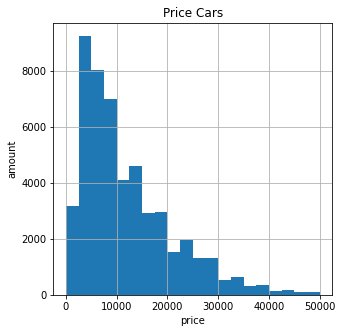

In [47]:

data.hist('price', bins = 20, range = (50,50000), figsize = (5,5))
plt.title('Price Cars')
plt.xlabel('price')
plt.ylabel('amount')
plt.show()

**we can see that there is a peek around price 90000, we can conclude the more the price is higher the amount is going less**

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

Text(0.5, 1.0, 'high Price Cars')

Text(0.5, 0, 'price')

Text(0, 0.5, 'amount')

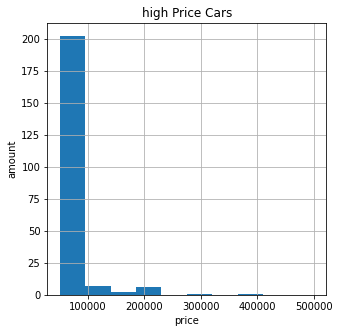

In [48]:
data.hist('price', bins = 10, range = (51000,500000), figsize = (5,5))
plt.title('high Price Cars')
plt.xlabel('price')
plt.ylabel('amount')
plt.show()

**we can see here a more detailed picture of the high price values, it looks like the peek is closer to prices around 100000, and as soon as we pass it, the amount is lower**

<AxesSubplot:>

(0.0, 500000.0)

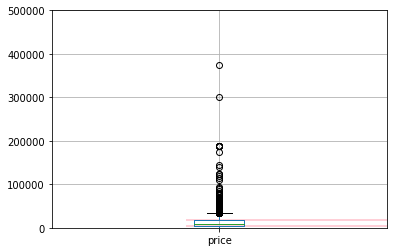

In [49]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
data.boxplot('price')
plt.ylim (0, 500000)
plt.hlines(y=[q1, q3], xmin= 0.9, xmax=1.5, color = 'pink')

**here we can see that there is alot of outliers around the 100000, and it needs to be fixed. maybe its some cars with very high prices that doesnt match the range in the boxplot**

# years_released

array([[<AxesSubplot:title={'center':'years_released'}>]], dtype=object)

Text(0.5, 1.0, "car's age")

Text(0.5, 0, 'years_released')

Text(0, 0.5, 'amount')

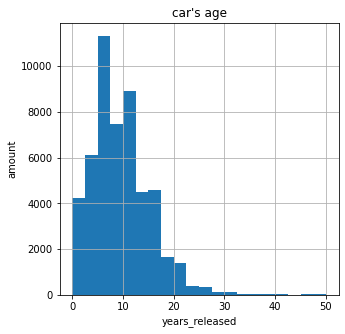

In [50]:

data.hist('years_released', bins = 20, range = (0,50), figsize = (5,5))
plt.title('car\'s age')
plt.xlabel('years_released')
plt.ylabel('amount')
plt.show()

** We can conclude from the histogram above that the highest amount of car's age are between 5+ - 10+ years old**

array([[<AxesSubplot:title={'center':'years_released'}>]], dtype=object)

Text(0.5, 1.0, 'high years released')

Text(0.5, 0, 'years_released')

Text(0, 0.5, 'amount')

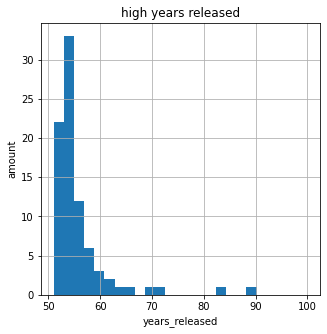

In [51]:
data.hist('years_released', bins = 25, range = (51,100), figsize = (5,5))
plt.title('high years released')
plt.xlabel('years_released')
plt.ylabel('amount')
plt.show()

**A more detailed histogram that covers cars that are older than 50 years**

<AxesSubplot:>

Text(0.5, 1.0, 'years released boxplot')

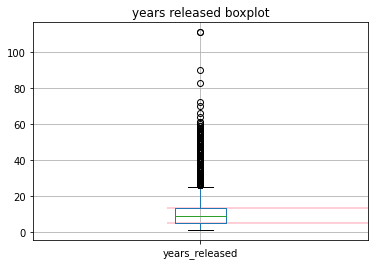

In [52]:
y1 = data['years_released'].quantile(0.25)
y3 = data['years_released'].quantile(0.75)
data.boxplot('years_released')
plt.hlines(y=[y1, y3], xmin= 0.9, xmax=1.5, color = 'pink')
plt.title('years released boxplot')

**plenty of outliers! cars that are older than 30 years are outliers in this boxplot**

# odometer

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

Text(0.5, 1.0, 'odometer histogram')

Text(0.5, 0, 'odometer')

Text(0, 0.5, 'amount')

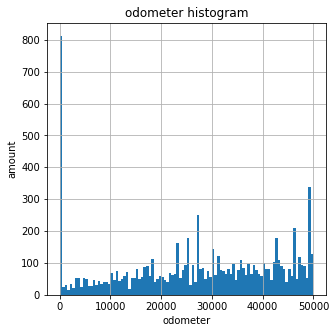

In [53]:

data.hist('odometer', bins = 100, range = (0,50000), figsize = (5,5))
plt.title('odometer histogram')
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()

**We can see some data, but can't really conclude anything**

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

Text(0.5, 1.0, 'ranged odometer')

Text(0.5, 0, 'odometer')

Text(0, 0.5, 'amount')

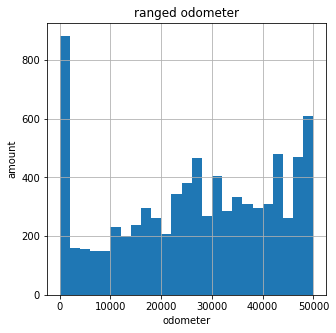

In [54]:
data.hist('odometer', bins =25, range = (0,50000), figsize = (5,5))
plt.title('ranged odometer')
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()

**Cars between 10000 - 40000 odometer**

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

Text(0.5, 1.0, 'high odometer')

Text(0.5, 0, 'odometer')

Text(0, 0.5, 'amount')

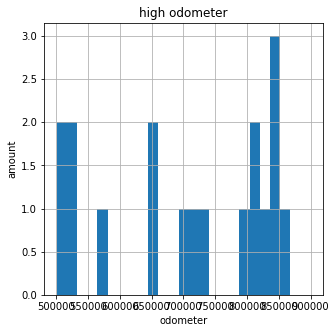

In [55]:
data.hist('odometer', bins =25, range = (501000,900000), figsize = (5,5))
plt.title('high odometer')
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()

**Cars between 5000000 - 900000 odometer**

<AxesSubplot:>

Text(0.5, 1.0, 'odometer boxplot')

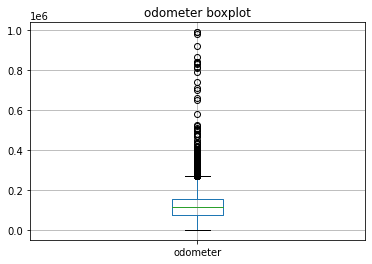

In [56]:
o1 = data['odometer'].quantile(0.25)
o3 = data['odometer'].quantile(0.75)
data.boxplot('odometer')
plt.title('odometer boxplot')

**outliers in odometer column is cars with odometer above 300 k **

# cylinders

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

Text(0.5, 1.0, 'cylinders histogram')

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'amount')

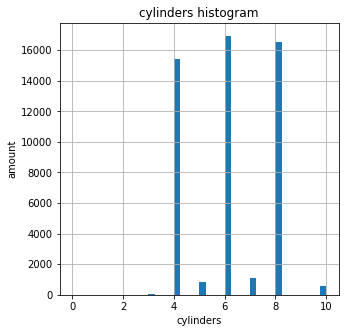

In [57]:
data.hist('cylinders', bins = 40, range = (0,10), figsize = (5,5) )
plt.title('cylinders histogram')
plt.xlabel('cylinders')
plt.ylabel('amount')
plt.show()

**The highest amount of cars is with 6 cylinders, after that 8 and then 4 cylinders**

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

Text(0.5, 1.0, 'high cylinders')

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'amount')

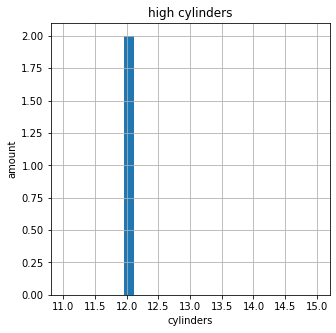

In [58]:
data.hist('cylinders', bins = 25, range = (11,15), figsize = (5,5))
plt.title('high cylinders')
plt.xlabel('cylinders')
plt.ylabel('amount')
plt.show()

**about the high number of cylinders (12) maybe it's busses or trucks.**

<AxesSubplot:>

Text(0.5, 1.0, 'cylinders boxplot')

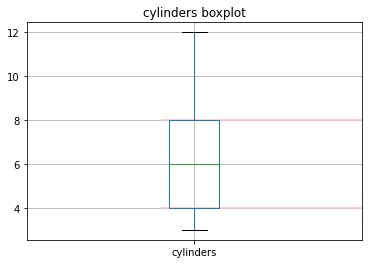

In [59]:
c1 = data['cylinders'].quantile(0.25)
c3 = data['cylinders'].quantile(0.75)
data.boxplot('cylinders')
plt.hlines(y=[c1, c3], xmin= 0.9, xmax=1.5, color = 'pink')
plt.title('cylinders boxplot')


**No outliers, all good with the boxplot**

# condition

<AxesSubplot:>

Text(0.5, 1.0, 'condition')

Text(0.5, 0, 'condition')

Text(0, 0.5, 'amount')

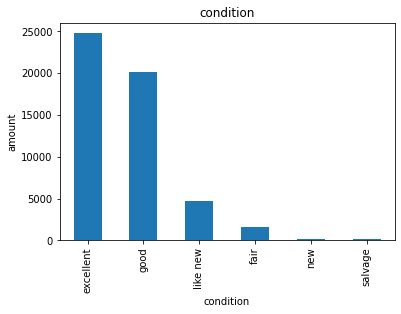

In [60]:
#condition
data['condition'].value_counts().plot(kind= 'bar')
plt.title('condition')
plt.xlabel('condition')
plt.ylabel('amount')
plt.show()

**The most common cars are excellent and good**

array([[<AxesSubplot:title={'center':'condition_rate'}>]], dtype=object)

Text(0.5, 1.0, 'high condition')

Text(0.5, 0, 'condition')

Text(0, 0.5, 'amount')

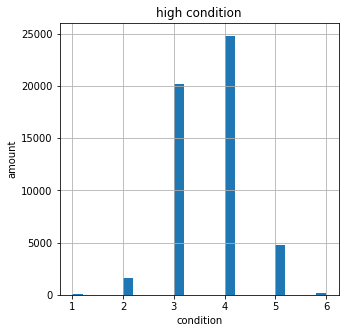

In [61]:
data.hist('condition_rate', bins = 25, range = (1,6), figsize = (5,5))
plt.title('high condition')
plt.xlabel('condition')
plt.ylabel('amount')
plt.show()


**High number of cars are with 4 rate condition**

<AxesSubplot:>

Text(0.5, 1.0, 'condition boxplot')

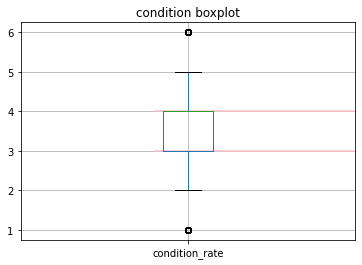

In [62]:
n1 = data['condition_rate'].quantile(0.25)
n3 = data['condition_rate'].quantile(0.75)
data.boxplot('condition_rate')
plt.hlines(y=[n1, n3], xmin= 0.9, xmax=1.5, color = 'pink')
plt.title('condition boxplot')

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

Text(0.5, 1.0, 'Price Cars')

Text(0.5, 0, 'price')

Text(0, 0.5, 'amount')

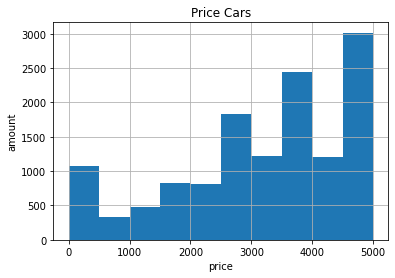

In [63]:
# Determine the lower limits for outliers in 'price'
data.hist('price', range = (0, q1))
plt.title('Price Cars')
plt.xlabel('price')
plt.ylabel('amount')
plt.show()

**we can see a histogram that shows us the first quantile of the car's prices**

array([[<AxesSubplot:title={'center':'years_released'}>]], dtype=object)

Text(0.5, 1.0, "car's age")

Text(0.5, 0, 'years_released')

Text(0, 0.5, 'amount')

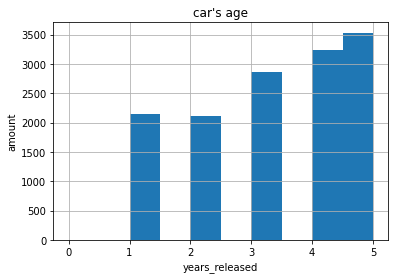

In [64]:
# Determine the lower limits for outliers in 'years_released'
data.hist('years_released', range = (0,y1))
plt.title('car\'s age')
plt.xlabel('years_released')
plt.ylabel('amount')
plt.show()

**we can see a histogram that shows us the first quantile of the car's ages**

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

Text(0.5, 1.0, 'odometer histogram')

Text(0.5, 0, 'odometer')

Text(0, 0.5, 'amount')

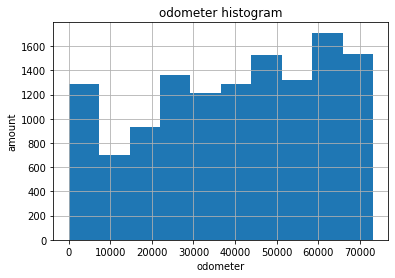

In [65]:
# Determine the lower limits for outliers in 'odometer'
data.hist('odometer', range = (0,o1))
plt.title('odometer histogram')
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()

**we can see a histogram that shows us the max odometer (around 60000) in the first quantile**

<AxesSubplot:>

Text(0.5, 1.0, 'cylinders')

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'amount')

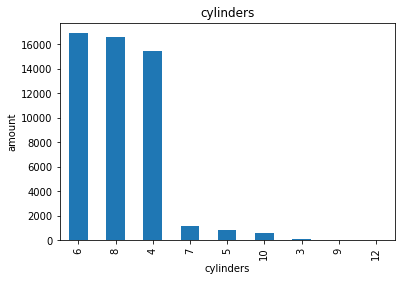

In [66]:
# Determine the lower limits for outliers in 'cylinders'
data['cylinders'].value_counts().plot(kind= 'bar')
plt.title('cylinders')
plt.xlabel('cylinders')
plt.ylabel('amount')
plt.show()

In [67]:
# Reviewer's code

data.cylinders.value_counts().sort_index()

3        80
4     15452
5       806
6     16932
7      1120
8     16568
9         9
10      556
12        2
Name: cylinders, dtype: int64

<AxesSubplot:>

Text(0.5, 1.0, 'condition_rate')

Text(0.5, 0, 'condition_rate')

Text(0, 0.5, 'amount')

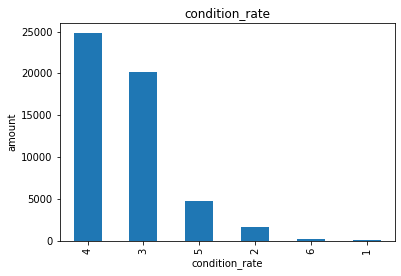

In [68]:
# Determine the lower limits for outliers in 'condition'
data['condition_rate'].value_counts().plot(kind= 'bar')
plt.title('condition_rate')
plt.xlabel('condition_rate')
plt.ylabel('amount')
plt.show()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

Text(0.5, 1.0, 'Price Cars')

Text(0.5, 0, 'price')

Text(0, 0.5, 'amount')

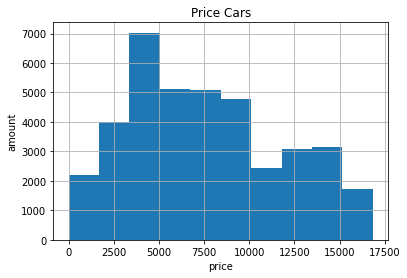

In [69]:
# Determine the upper limits for outliers for 'price'
data.hist('price', range = (0, q3))
plt.title('Price Cars')
plt.xlabel('price')
plt.ylabel('amount')
plt.show()

**we can see a histogram that shows us the last quantile of our data (0.75 < data) for the price, for example there is around 7000 cars that cost 3000**

array([[<AxesSubplot:title={'center':'years_released'}>]], dtype=object)

Text(0.5, 1.0, "car's age")

Text(0.5, 0, 'years_released')

Text(0, 0.5, 'amount')

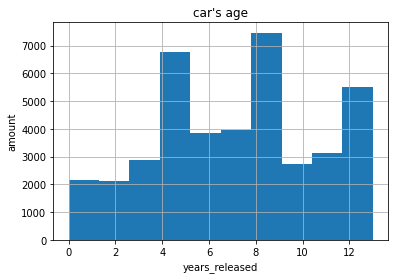

In [70]:
# Determine the upper limits for outliers for 'years_released'
data.hist('years_released', range = (0,y3))
plt.title('car\'s age')
plt.xlabel('years_released')
plt.ylabel('amount')
plt.show()

**we can see a histogram that shows us the last quantile of our data (0.75 < data).**

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

Text(0.5, 1.0, 'odometer histogram')

Text(0.5, 0, 'odometer')

Text(0, 0.5, 'amount')

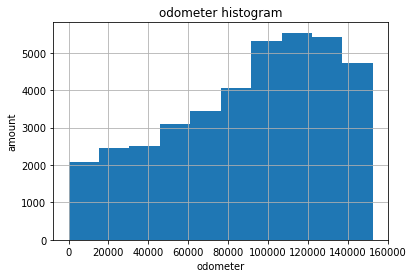

In [71]:
# Determine the upper limits for outliers for 'odometer'
data.hist('odometer', range = (0,o3))
plt.title('odometer histogram')
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()

**we can see a histogram that shows us the last quantile of our data (0.75 < data), around 5000 cars with 120000 odometer.**

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

Text(0.5, 1.0, 'cylinders histogram')

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'amount')

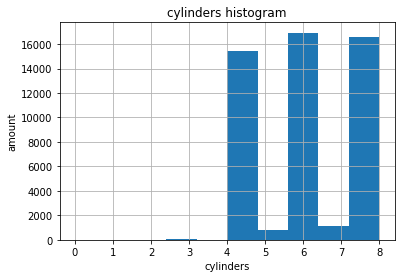

In [72]:
# Determine the upper limits for outliers for 'cylinders'
data.hist('cylinders', range = (0,c3))
plt.title('cylinders histogram')
plt.xlabel('cylinders')
plt.ylabel('amount')
plt.show()

array([[<AxesSubplot:title={'center':'condition_rate'}>]], dtype=object)

Text(0.5, 1.0, 'high condition')

Text(0.5, 0, 'condition')

Text(0, 0.5, 'amount')

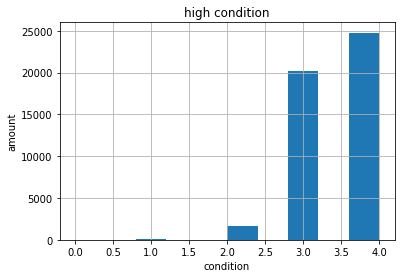

In [73]:
#Determine the upper limits for outliers for 'condition'
data.hist('condition_rate', range = (0,n3))
plt.title('high condition')
plt.xlabel('condition')
plt.ylabel('amount')
plt.show()

In [74]:
# Store data without outliers in a separate DataFrame

expensive_price = data.query('price > @q3')
print((expensive_price.shape[0]/ data['price'].shape[0]) * 100)

old_post = data.query('years_released > @y3')
print((old_post.shape[0]/ data['years_released'].shape[0]) * 100)

high_mil = data.query('odometer > @o3')
print((high_mil.shape[0]/ data['odometer'].shape[0]) * 100)

many_cylinders = data.query('cylinders > @c3')
print((many_cylinders.shape[0]/data['cylinders'].shape[0]) * 100)

high_condition = data.query('condition_rate > @n3')
print((high_condition.shape[0]/ data['condition_rate'].shape[0]) * 100)


24.999514798641435
21.32751091703057
24.995633187772924
1.1004366812227073
9.480834546336729


In [75]:
#adding new a separate data for outliers and saving the data without outliers in seperate variable
data['car_index'] = data.index + 1
bad_data = data.query('price < 1000 | price > 35000 | condition_rate > 5 | odometer > 500000 | cylinders > 8 | days_listed > 120')
bad_data.head()
outliers = bad_data['car_index']
good_data = data.query('car_index not in @outliers')
good_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_released,condition_rate,car_index
34,9500,2008,toyota highlander,good,6,gas,149799,automatic,SUV,Other,True,2018-06-04,121,11,3,35
51,3800,2012,ford focus,good,4,gas,130323,automatic,sedan,black,True,2018-11-29,261,7,3,52
89,18800,2015,chevrolet camaro lt coupe 2d,good,6,gas,33926,other,coupe,grey,True,2019-01-16,152,5,3,90
99,39950,2018,chevrolet silverado,excellent,8,gas,18500,automatic,truck,Other,True,2018-08-05,16,1,4,100
104,22900,2014,ford f150 supercrew cab xlt,good,6,gas,73711,automatic,pickup,white,True,2019-02-27,141,6,3,105


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_released,condition_rate,car_index
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,Other,True,2018-06-23,19,8,3,1
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,8,3,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,7,5,3
3,1500,2003,ford f-150,fair,8,gas,202621,automatic,pickup,Other,True,2019-03-22,9,17,2,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,3,4,5


<div class="alert alert-info">
<h2> Student's comment</h2> 
</div>  1)yes, there are cars with very low prices. In the histogram I plotted before we can see that there are around 1000 cars with cheap price(maybe it's about broken cars or very old cars)

2) As the histogram I plotted before in the upper limits with the odometer column, we can see that the highest mileage for a car is around 160000, and because of that, may a car with 250000 odometer consider an outlier (about 1000 vehicle like this)

3) I think with the days_listed histogram, when I plotted a histogram from the bad data (the outliers) it looks like that 120 days listed is an outlier value

In [76]:


print(len(good_data))

good_data[['price', 'years_released', 'odometer', 'cylinders', 'condition_rate']].describe().loc[['min', 'max']]

47560


,price,years_released,odometer,cylinders,condition_rate
min,1000.0,1.0,0.0,3.0,1.0
max,35000.0,111.0,500000.0,8.0,5.0


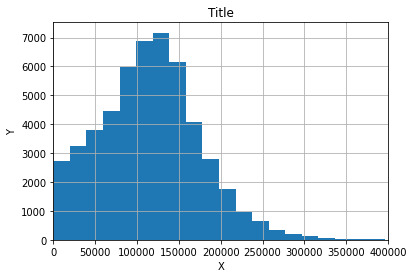

In [77]:

data.odometer.hist(bins=50)
plt.xlim(0, 400000)

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y');

In [78]:
data.query('price<200').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_released,condition_rate,car_index
405,1,2014,chevrolet camaro,excellent,6,gas,71310,automatic,coupe,Other,True,2018-07-14,29,5,4,406
844,111,2003,ford mustang,good,8,other,115224,manual,coupe,red,True,2018-09-14,24,16,3,845
1572,155,2008,nissan sentra,excellent,4,gas,116806,automatic,sedan,red,True,2018-08-26,50,11,4,1573
1573,176,2013,nissan altima,excellent,4,gas,145860,automatic,sedan,black,True,2018-05-31,35,6,4,1574
2143,196,2011,chevrolet cruze,excellent,4,gas,134951,automatic,sedan,black,True,2018-12-26,61,8,4,2144


In [79]:
data.query('odometer>250000').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_released,condition_rate,car_index
33,3890,2011,subaru outback,excellent,4,gas,300000,automatic,SUV,white,True,2018-12-25,31,8,4,34
45,2400,2001,toyota camry,good,4,gas,277564,automatic,coupe,yellow,True,2018-05-27,51,18,3,46
49,3200,2006,honda civic,excellent,4,gas,255390,automatic,sedan,blue,True,2018-10-18,23,13,4,50
140,2000,1993,ford f-150,good,8,gas,258225,automatic,truck,red,True,2019-03-06,34,27,3,141
267,3250,2001,ford f150,fair,8,gas,296000,automatic,truck,black,True,2018-12-07,24,18,2,268


In [80]:
print(len(outliers)/len(data)*100)

7.695293546821931


## Study core parameters without outliers

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

Text(0.5, 1.0, 'good data price hist')

Text(0.5, 0, 'price')

Text(0, 0.5, 'amount')

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

Text(0.5, 1.0, 'old price hist')

Text(0.5, 0, 'price')

Text(0, 0.5, 'amount')

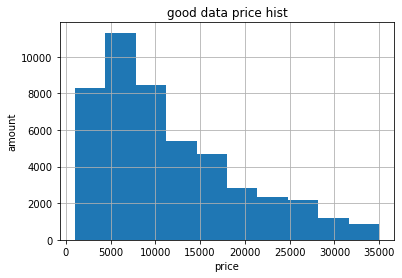

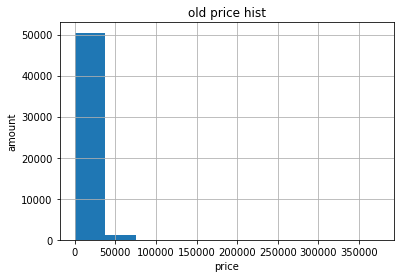

In [81]:
#filtered data 'price'
good_data.hist('price')
plt.title('good data price hist')
plt.xlabel('price')
plt.ylabel('amount')

data.hist('price')
plt.title('old price hist')
plt.xlabel('price')
plt.ylabel('amount')

array([[<AxesSubplot:title={'center':'years_released'}>]], dtype=object)

Text(0.5, 1.0, 'good data years released hist')

Text(0.5, 0, 'years_released')

Text(0, 0.5, 'amount')

array([[<AxesSubplot:title={'center':'years_released'}>]], dtype=object)

Text(0.5, 1.0, 'old years released hist')

Text(0.5, 0, 'years_released')

Text(0, 0.5, 'amount')

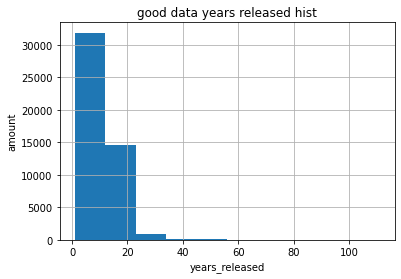

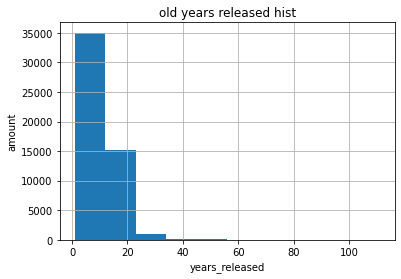

In [82]:
#filtered data 'years_released'
good_data.hist('years_released')
plt.title('good data years released hist')
plt.xlabel('years_released')
plt.ylabel('amount')

data.hist('years_released')
plt.title('old years released hist')
plt.xlabel('years_released')
plt.ylabel('amount')

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

Text(0.5, 1.0, 'good data odometer hist')

Text(0.5, 0, 'odometer')

Text(0, 0.5, 'amount')

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

Text(0.5, 1.0, 'old odometer hist')

Text(0.5, 0, 'odometer')

Text(0, 0.5, 'amount')

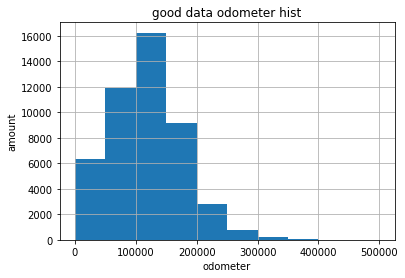

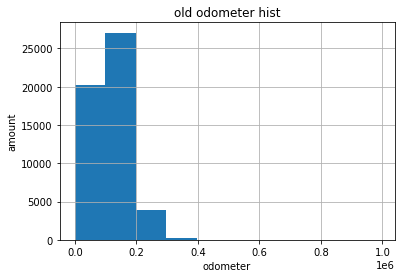

In [83]:
##filtered data 'odometer'
good_data.hist('odometer')
plt.title('good data odometer hist')
plt.xlabel('odometer')
plt.ylabel('amount')

data.hist('odometer')
plt.title('old odometer hist')
plt.xlabel('odometer')
plt.ylabel('amount')

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

Text(0.5, 1.0, 'good data cylinders hist')

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'amount')

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

Text(0.5, 1.0, 'old cylinders hist')

Text(0.5, 0, 'cylinders')

Text(0, 0.5, 'amount')

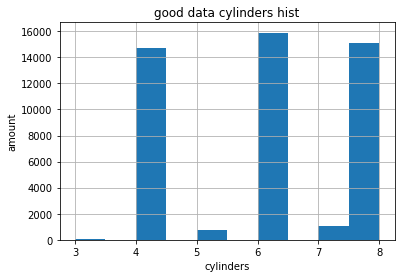

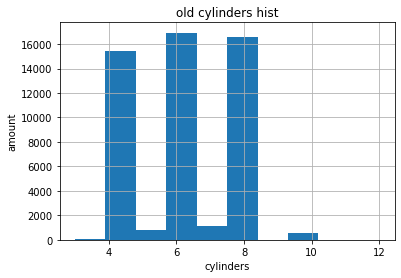

In [84]:
#filtered data 'cylinders'
good_data.hist('cylinders')
plt.title('good data cylinders hist')
plt.xlabel('cylinders')
plt.ylabel('amount')

data.hist('cylinders')
plt.title('old cylinders hist')
plt.xlabel('cylinders')
plt.ylabel('amount')

array([[<AxesSubplot:title={'center':'condition_rate'}>]], dtype=object)

Text(0.5, 1.0, 'good data condition hist')

Text(0.5, 0, 'condition_rate')

Text(0, 0.5, 'amount')

array([[<AxesSubplot:title={'center':'condition_rate'}>]], dtype=object)

Text(0.5, 1.0, 'old condition hist')

Text(0.5, 0, 'condition_rate')

Text(0, 0.5, 'amount')

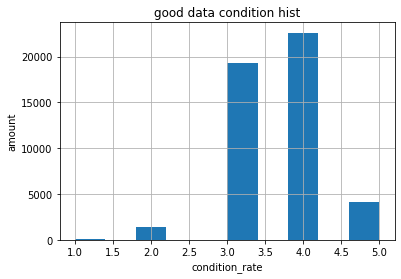

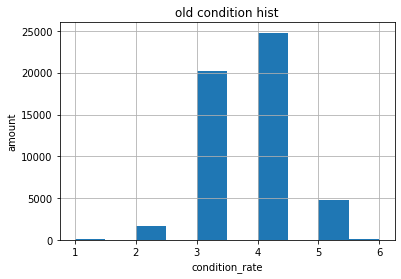

In [85]:
#filtered data 'condition'
good_data.hist('condition_rate')
plt.title('good data condition hist')
plt.xlabel('condition_rate')
plt.ylabel('amount')

data.hist('condition_rate')
plt.title('old condition hist')
plt.xlabel('condition_rate')
plt.ylabel('amount')

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

<AxesSubplot:title={'center':'days listed column'}, ylabel='Frequency'>

Text(0.5, 0, 'old data days_listed')

Text(0, 0.5, 'amount')

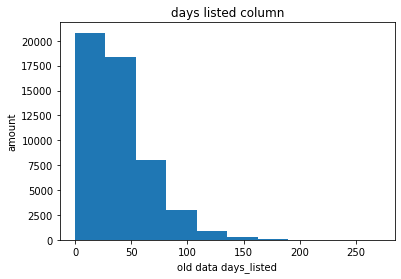

<AxesSubplot:title={'center':'days listed column'}, ylabel='Frequency'>

Text(0.5, 0, 'new days_listed')

Text(0, 0.5, 'amount')

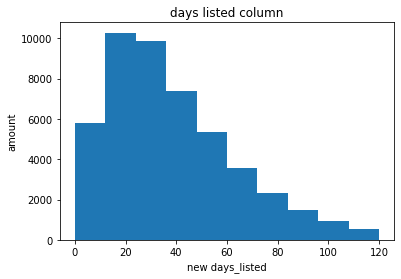

<AxesSubplot:title={'center':'days listed column'}, ylabel='Frequency'>

Text(0.5, 0, ' outliers days_listed')

Text(0, 0.5, 'amount')

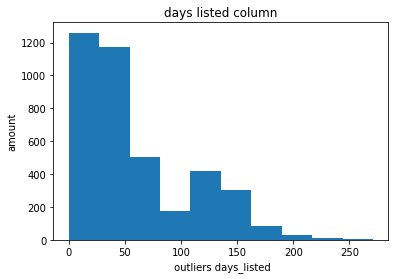

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'all cars days listed')

Text(0.5, 0, 'days_listed')

Text(0, 0.5, 'amount')

,price,model_year,cylinders,odometer,is_4wd,days_listed,years_released,condition_rate,car_index
price,1.000000,0.486389,0.330235,-0.485610,NaN,0.003112,-0.484796,0.218210,-0.018495
model_year,0.486389,1.000000,-0.202152,-0.476029,NaN,0.000837,-0.996977,0.243728,-0.017681
cylinders,0.330235,-0.202152,1.000000,0.152343,NaN,0.004905,0.201632,-0.095382,0.002537
odometer,-0.485610,-0.476029,0.152343,1.000000,NaN,-0.000310,0.474357,-0.286726,0.021396
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,0.003112,0.000837,0.004905,-0.000310,NaN,1.000000,-0.000209,0.000410,0.007457
years_released,-0.484796,-0.996977,0.201632,0.474357,NaN,-0.000209,1.000000,-0.242943,0.017546
condition_rate,0.218210,0.243728,-0.095382,-0.286726,NaN,0.000410,-0.242943,1.000000,-0.002908
car_index,-0.018495,-0.017681,0.002537,0.021396,NaN,0.007457,0.017546,-0.002908,1.000000


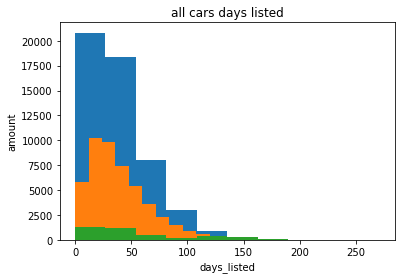

In [86]:
data['days_listed'].plot(kind= 'hist', title='days listed column')
plt.xlabel('old data days_listed')
plt.ylabel('amount')
plt.show()

good_data['days_listed'].plot(kind= 'hist', title='days listed column')
plt.xlabel('new days_listed')
plt.ylabel('amount')
plt.show()

bad_data['days_listed'].plot(kind= 'hist', title='days listed column')
plt.xlabel(' outliers days_listed')
plt.ylabel('amount')
plt.show()

data['days_listed'].plot(kind= 'hist')
good_data['days_listed'].plot(kind= 'hist')
bad_data['days_listed'].plot(kind= 'hist')
plt.title('all cars days listed')
plt.xlabel('days_listed')
plt.ylabel('amount')
good_data.corr()

In [87]:
#mean days_listed
data['days_listed'].mean()
good_data['days_listed'].mean()
bad_data['days_listed'].mean()

39.55475982532751

37.8419259882254

60.10012610340479

In [88]:
#median days listed
data['days_listed'].median()
good_data['days_listed'].median()
bad_data['days_listed'].median()

33.0

33.0

42.0

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

<AxesSubplot:>

Text(0.5, 1.0, 'days listed histogram')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

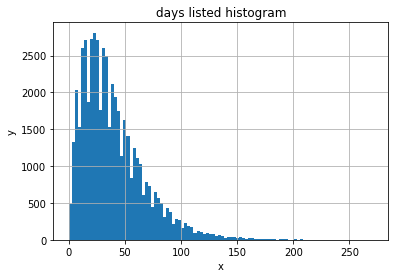

In [91]:
data['days_listed'].describe()

data['days_listed'].hist(bins=100)
plt.title('days listed histogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<div class="alert alert-info">
<h2> 
    ads will last a longer time in the website if the ad is not attractive enough, or if its an old cars that no one is interested in or the same with very expensive cars and high condition rate and we dont have buyers for those. an ad will last less time on the website when the all the factors matches each other (odometer - model_year - price - condition_rate) and there is a buyer so the ad will be not relevant anymore or the same if there is an ads that get removed by the staff because they have some wrong details with entering them.

Stats:
 count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64


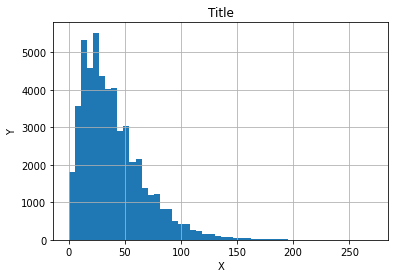

In [92]:

print('Stats:\n', data['days_listed'].describe())


data['days_listed'].hist(bins=50)

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y');


## Average price per each type of vehicle

<AxesSubplot:title={'center':'years price histogram'}, ylabel='Frequency'>

Text(0.5, 0, 'years_released')

Text(0, 0.5, 'amount')

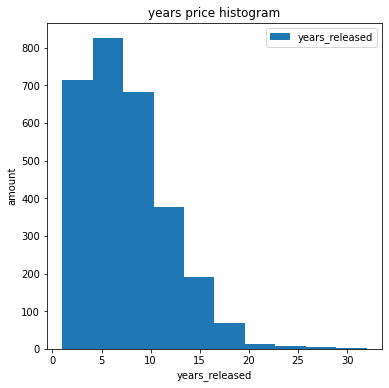

In [93]:
good_price = good_data.pivot_table(index='price', values = 'years_released', aggfunc='mean')
good_price.plot(kind= 'hist',title = 'years price histogram',figsize=(6,6))
plt.xlabel('years_released')
plt.ylabel('amount')
plt.show()


**data without outliers, a histogram about the car's age.**

<AxesSubplot:title={'center':'odometer histogram'}, ylabel='Frequency'>

Text(0.5, 0, 'odometer')

Text(0, 0.5, 'amount')

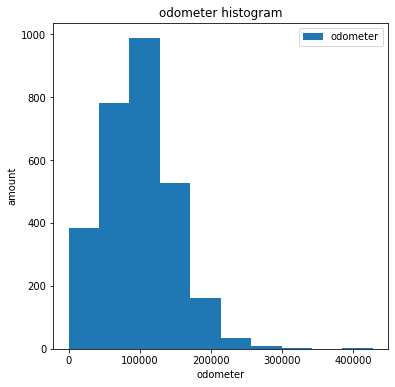

In [94]:
good_price = good_data.pivot_table(index='price', values = 'odometer', aggfunc='mean')
good_price.plot(kind= 'hist',title = 'odometer histogram',figsize=(6,6))
plt.xlabel('odometer')
plt.ylabel('amount')
plt.show()

**data without outliers, a histogram about the car's odometer.**

<AxesSubplot:title={'center':'condition_rate histogram'}, ylabel='Frequency'>

Text(0.5, 0, 'condition_rate')

Text(0, 0.5, 'amount')

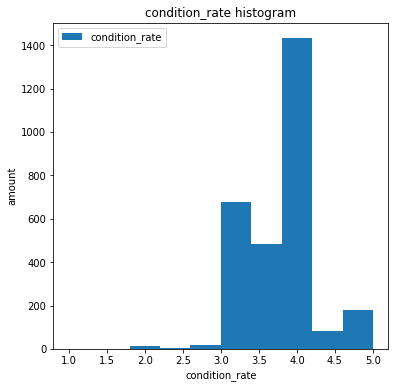

In [95]:
good_price = good_data.pivot_table(index='price', values = 'condition_rate', aggfunc='mean')
good_price.plot(kind= 'hist',title = 'condition_rate histogram',figsize=(6,6))
plt.xlabel('condition_rate')
plt.ylabel('amount')
plt.show()

**data without outliers, a histogram about the car's condition.**

,car_index
type,
SUV,11532
bus,11
convertible,404
coupe,2094
hatchback,998
mini-van,1122
offroad,200
other,247
pickup,6490


<AxesSubplot:xlabel='type'>

Text(0.5, 1.0, 'good types')

Text(0.5, 0, 'model')

Text(0, 0.5, 'amount')

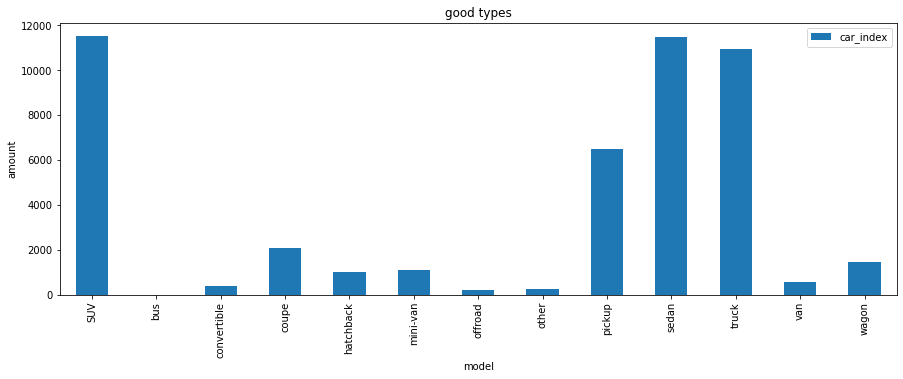

In [96]:
good_types = good_data.pivot_table(index='type', values='car_index', aggfunc='count')
good_types

good_types.plot(kind='bar', figsize=(15,5))
plt.title('good types')
plt.xlabel('model')
plt.ylabel('amount')

In [97]:
suv_data = good_data.query('type=="SUV"')
suv_data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,years_released,condition_rate,car_index
price,1.000000,0.611224,0.027870,-0.606601,NaN,-0.017277,-0.609373,0.294874,-0.005152
model_year,0.611224,1.000000,-0.305046,-0.577044,NaN,-0.007306,-0.996154,0.290892,-0.008216
cylinders,0.027870,-0.305046,1.000000,0.277561,NaN,0.014231,0.303504,-0.105140,0.005233
odometer,-0.606601,-0.577044,0.277561,1.000000,NaN,0.008938,0.574669,-0.336382,0.029809
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,-0.017277,-0.007306,0.014231,0.008938,NaN,1.000000,0.007495,-0.007699,0.003473
years_released,-0.609373,-0.996154,0.303504,0.574669,NaN,0.007495,1.000000,-0.290536,0.007881
condition_rate,0.294874,0.290892,-0.105140,-0.336382,NaN,-0.007699,-0.290536,1.000000,-0.023511
car_index,-0.005152,-0.008216,0.005233,0.029809,NaN,0.003473,0.007881,-0.023511,1.000000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='years_released', ylabel='price'>,
        <AxesSubplot:xlabel='condition_rate', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='years_released', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition_rate', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='years_released'>,
        <AxesSubplot:xlabel='odometer', ylabel='years_released'>,
        <AxesSubplot:xlabel='years_released', ylabel='years_released'>,
        <AxesSubplot:xlabel='condition_rate', ylabel='years_released'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_rate'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition_rate'>,
        <AxesSubplot:xlabel='years_released', ylabel='condition_rate'>,
        <AxesSubplot:xlabel='conditio

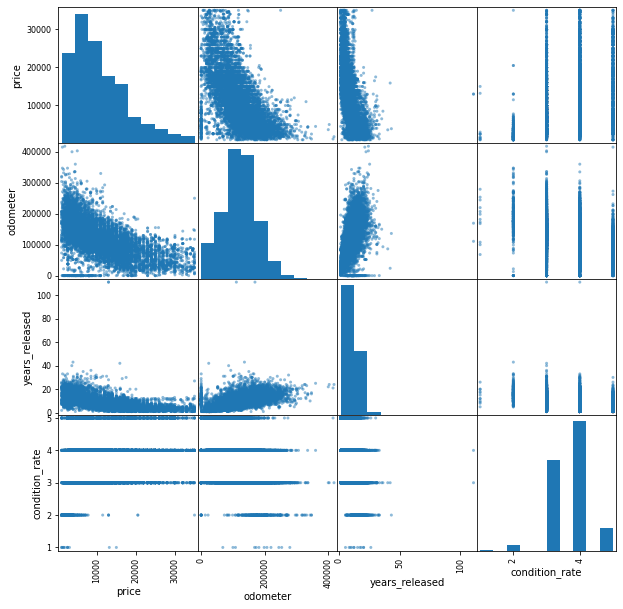

In [99]:
price_suv = suv_data[['price', 'odometer', 'years_released',  'condition_rate']]
pd.plotting.scatter_matrix(price_suv, figsize=(10,10))

<div class="alert alert-info">
<h2>
    there is a positive correlation between the years_released and the odometer, while the higher years released the higher odometer for the vehicle. 
    there is a negative correlation between the price and odometer, while the higher odometer the lower price we pay.
    there is a negative correlation between the price and the years_released while the higher years the lower price for same vehicle.

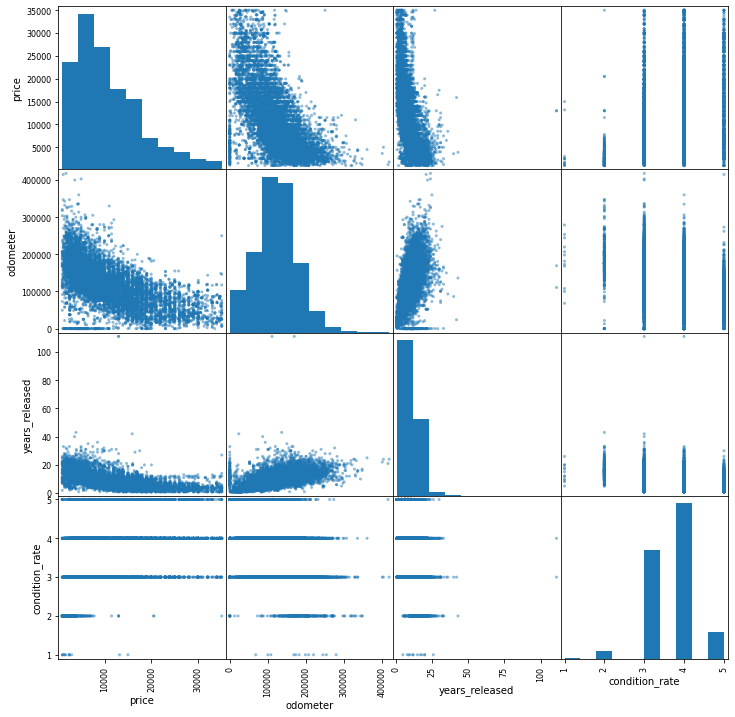

In [100]:

for_suvs = suv_data[['price', 'odometer', 'years_released',  'condition_rate']]

pd.plotting.scatter_matrix(for_suvs, figsize=(12,12));

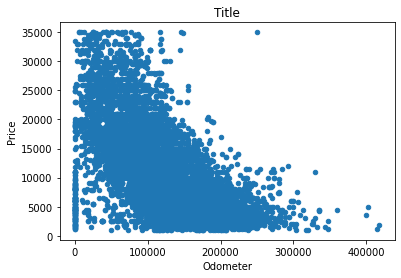

In [101]:

suv_data.plot.scatter(x='odometer', y='price')

plt.title('Title')
plt.xlabel('Odometer')
plt.ylabel('Price');

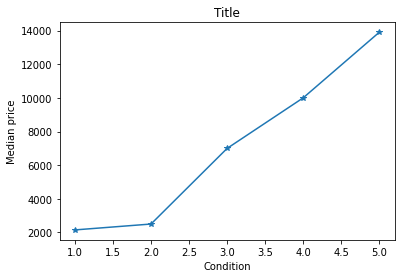

In [103]:

suv_data.groupby('condition_rate')['price'].median().plot(marker='*')

plt.title('Title')
plt.xlabel('Condition')
plt.ylabel('Median price');

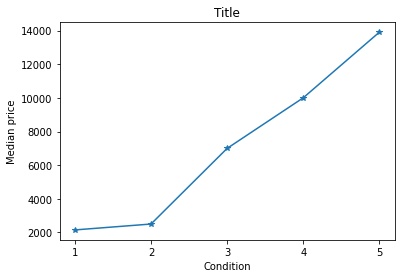

In [104]:

suv_data.groupby('condition_rate')['price'].median().plot(marker='*')

plt.title('Title')
plt.xlabel('Condition')
plt.ylabel('Median price')

plt.xticks(np.arange(1, suv_data.condition.nunique()+1))
plt.show();

In [105]:
price_suv.columns

Index(['price', 'odometer', 'years_released', 'condition_rate'], dtype='object')

<AxesSubplot:>

Text(0.5, 1.0, 'transmission X price')

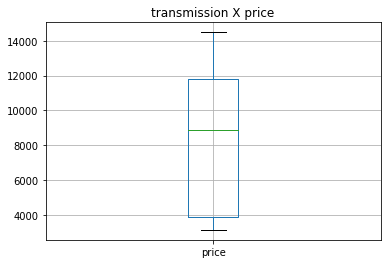

In [106]:
analyze_suv = price_suv.pivot_table(index = 'condition_rate', values = 'price')
analyze_suv.boxplot()
plt.title('transmission X price')
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'type X price')

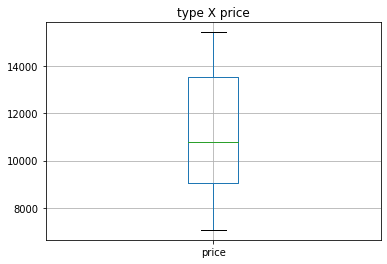

In [107]:
analyze_suv = good_data.pivot_table(index = 'type', values = 'price')
analyze_suv.boxplot()
plt.title('type X price')
plt.show()

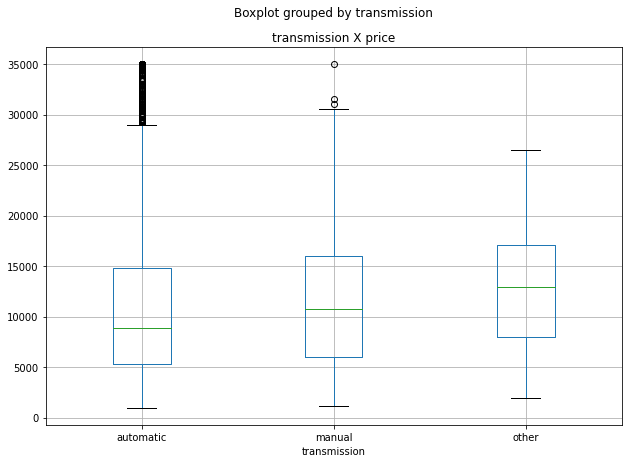

In [108]:

suv_data.boxplot('price', by = 'transmission', figsize=(10,7))
plt.title('transmission X price');


In [109]:

display('Default agg value: ', suv_data.pivot_table(index='transmission', values='price'))
print('\n')
display('Sum as agg value: ', suv_data.pivot_table(index='transmission', values='price', aggfunc='sum'))
print('\n')
display('Median as agg value: ', suv_data.pivot_table(index='transmission', values='price', aggfunc='median'))

'Default agg value: '

,price
transmission,
automatic,10727.658759
manual,11337.313402
other,12391.643678


'Sum as agg value: '

,price
transmission,
automatic,117575140
manual,5498597
other,1078073


'Median as agg value: '

,price
transmission,
automatic,8900
manual,10799
other,12900


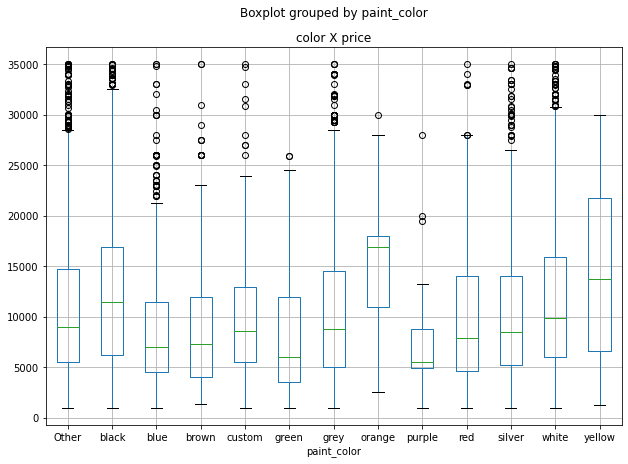

In [110]:

suv_data.boxplot('price', by = 'paint_color', figsize=(10,7))
plt.title('color X price');

** maybe there is only one car with an orange color? or painted recently **

In [111]:
sedan_data = good_data.query('type=="sedan"')
sedan_data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,years_released,condition_rate,car_index
price,1.000000,0.628028,0.008735,-0.623894,NaN,0.003201,-0.624461,0.314900,0.010121
model_year,0.628028,1.000000,-0.210469,-0.557160,NaN,-0.000194,-0.995285,0.261899,-0.010652
cylinders,0.008735,-0.210469,1.000000,0.123277,NaN,-0.005158,0.209673,-0.063289,0.018370
odometer,-0.623894,-0.557160,0.123277,1.000000,NaN,0.002430,0.554117,-0.326770,-0.005116
is_4wd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_listed,0.003201,-0.000194,-0.005158,0.002430,NaN,1.000000,0.000797,-0.009458,0.025043
years_released,-0.624461,-0.995285,0.209673,0.554117,NaN,0.000797,1.000000,-0.259734,0.009984
condition_rate,0.314900,0.261899,-0.063289,-0.326770,NaN,-0.009458,-0.259734,1.000000,-0.014984
car_index,0.010121,-0.010652,0.018370,-0.005116,NaN,0.025043,0.009984,-0.014984,1.000000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='years_released', ylabel='price'>,
        <AxesSubplot:xlabel='condition_rate', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='years_released', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition_rate', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='years_released'>,
        <AxesSubplot:xlabel='odometer', ylabel='years_released'>,
        <AxesSubplot:xlabel='years_released', ylabel='years_released'>,
        <AxesSubplot:xlabel='condition_rate', ylabel='years_released'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_rate'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition_rate'>,
        <AxesSubplot:xlabel='years_released', ylabel='condition_rate'>,
        <AxesSubplot:xlabel='conditio

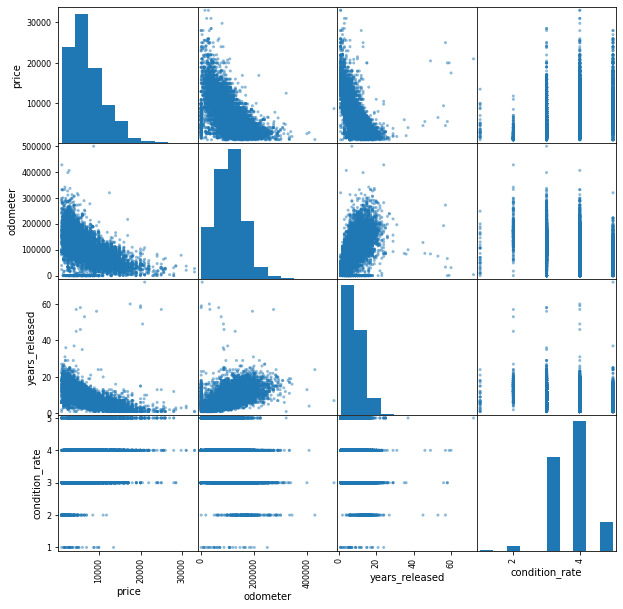

In [120]:
price_sedan = sedan_data[['price', 'odometer', 'years_released',  'condition_rate']]
pd.plotting.scatter_matrix(price_sedan, figsize=(10,10))

<div class="alert alert-info">
<h2>
    a scatter matrix plot to see how the price is affected by the odomter, car's age and condition level. 
    we can see a negative correlation between the odometer and price while the gragh is going down to the left when we go up with axis X, that means the more odometer the less we pay for the same car. the same for years_releases which means the more the car's age the less price we pay.

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

Text(0.5, 1.0, 'transmission X price')

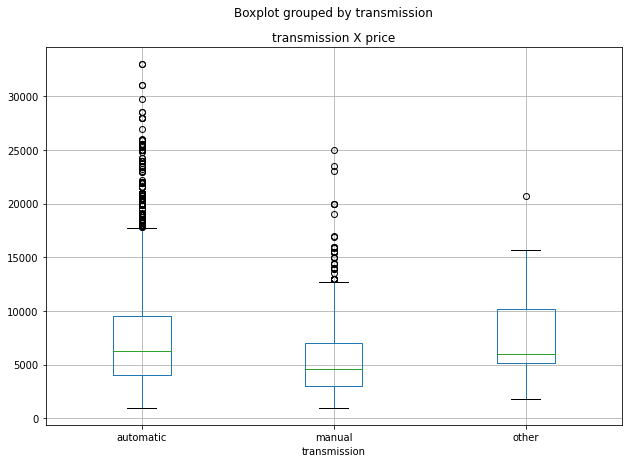

In [121]:
sedan_data.boxplot('price', by = 'transmission', figsize=(10,7))
plt.title('transmission X price')

<div class="alert alert-info">
<h2> here looks like we gor a lot of outliers in the automatic transmission.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

Text(0.5, 1.0, 'paint color X price')

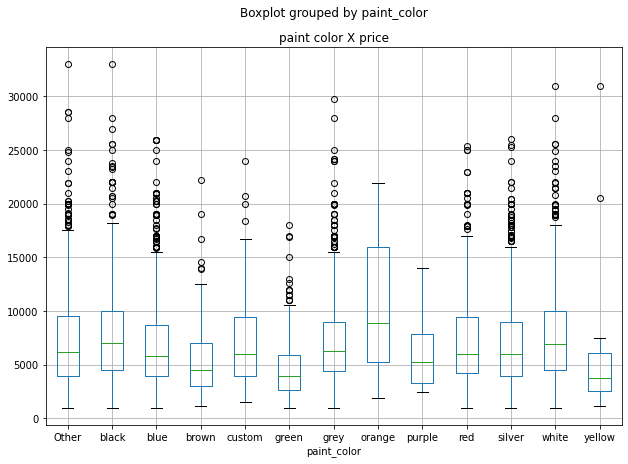

In [122]:
sedan_data.boxplot('price', by = 'paint_color', figsize=(10,7))
plt.title('paint color X price')

<div class="alert alert-info">
<h2> looks like the orange and purple are an outliers here too

In [126]:
good_data['price'].describe()

count    47560.000000
mean     11509.545921
std       7843.345784
min       1000.000000
25%       5300.000000
50%       9000.000000
75%      15995.000000
max      35000.000000
Name: price, dtype: float64

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

<AxesSubplot:>

Text(0.5, 1.0, 'transmission type boxplot')

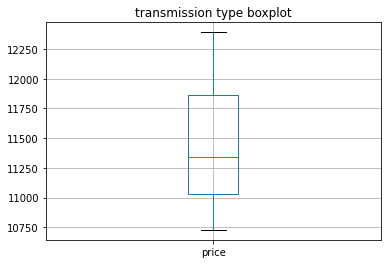

<AxesSubplot:>

Text(0.5, 1.0, 'paint color boxplot')

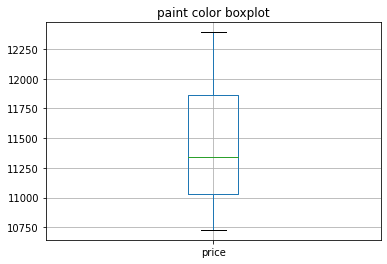

<AxesSubplot:>

Text(0.5, 1.0, 'type boxplot')

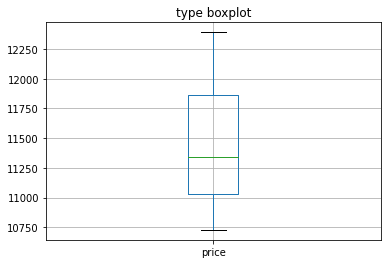

In [113]:
categorical_suv = suv_data.pivot_table(index='transmission', values = 'price')
categorical_suv.boxplot()
plt.title('transmission type boxplot')
plt.show()

categorical_suv1 = suv_data.pivot_table(index='paint_color', values = 'price')
categorical_suv.boxplot()
plt.title('paint color boxplot')
plt.show()

categorical_suv1 = good_data.pivot_table(index='type', values = 'price')
categorical_suv.boxplot()
plt.title('type boxplot')
plt.show()

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

<div class="alert alert-info">
<h2> adding to the conclusion above, I fixed the min price of the vehicles so we don't have a 1$ car.
About suv and sedan as I've written above:
1-negative correlation between the odometer and the price, while the higher odometer the lower price we pay for the vehicle. 
2-negative correlation between the odometer and condition_rate, while the higher odometer the lower condition_rate for the vehicle.
3-negative correlation between the price and the odometer while the higher odometer the lower price for the vehicle.